# Oasis Infobyte (Data Science)

## Vineetha C

## TASK 4

#### Build a Python-based email spam detector using machine learning to classify emails as either spam or non-spam based on their content and characteristics.

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages to create training models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

# Spam/Ham Dataset

In [3]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

# Data Exploration

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
len(df)

5572

In [6]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.rename({'v1': 'Status', 'v2': 'Message'}, axis = 1, inplace = True)
df

,Status,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
len(df[df.Status == 'spam'])

747

In [8]:
len(df[df.Status == 'ham'])

4825

In [9]:
types = df.Status.unique()
print(types)

['ham' 'spam']


# Data Preprocessing

In [10]:
df.loc[df["Status"] == 'ham', "Status"] = 1

In [11]:
df.loc[df["Status"] == 'spam', "Status"] = 0

In [12]:
df.head()

,Status,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

### Ham v/s Spam

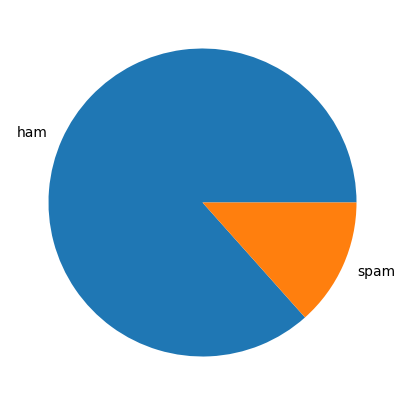

In [13]:
df['Status'].value_counts()

plt.figure(figsize = (5, 5))

plt.pie([4825, 747], labels = types)
plt.show()

# Identifying dependent and independant variables

In [14]:
df_x = df["Message"]
df_y = df["Status"]

# Training the models

### Split train and test data

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

### Frequencies of each word

In [16]:
cv = CountVectorizer()

In [17]:
x_traincv=cv.fit_transform(x_train)

In [18]:
x_testcv=cv.transform(x_test)
x_testcv

<1115x7689 sparse matrix of type '<class 'numpy.int64'>'
	with 13839 stored elements in Compressed Sparse Row format>

In [19]:
x_testcv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Multinomial Naive Bayes Model

In [20]:
mnb = MultinomialNB()

In [21]:
y_train = y_train.astype('int')

In [22]:
y_train

1457    0
472     1
2481    1
243     1
1413    0
       ..
3671    1
709     0
2487    1
174     1
1146    1
Name: Status, Length: 4457, dtype: int32

In [23]:
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [24]:
predictions = mnb.predict(x_testcv)
predictions
a = np.array(y_test)
a

count = 0
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1

acc = count/len(predictions)
acc

0.9820627802690582

# Prediction example

In [25]:
x_test1 = "This is a prize money message. Contact this number if interested"
x_testcv1 = cv.transform([x_test1])

In [26]:
pred1 = mnb.predict(x_testcv1)
if pred1[0] == 0:
    print("It is a spam message!")
else:
    print("It is not a spam message")

It is a spam message!
